In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
mat = loadmat("ex7data2.mat")
X = mat["X"]

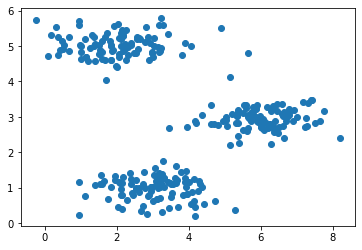

In [2]:
plt.scatter(X[:,0], X[:,1])

In [3]:
def findClosestCentroids(X, centroids):
    m, n = X.shape
    K = centroids.shape[0]
    idx = np.zeros((m, 1))
    for i in range(m):
        k1 = (X[i,:] - centroids)**2
        sumation = np.sum(k1, axis = 1)
        idx[i] = np.argmin(sumation)+1
    return idx

K = 3
initial_centroids = np.array([[3,3],[6,2],[8,5]])
idx = findClosestCentroids(X, initial_centroids)
print("Closest centroids for the first 3 examples:\n",idx[0:3])
        
        

Closest centroids for the first 3 examples:
 [[1.]
 [3.]
 [2.]]


In [4]:
def computeCentroids(X, idx, K, n):
    centroids = np.zeros((K,n))
    m, n = X.shape
    for i in range(K):
        indices = (idx == (i+1)).flatten()
        centroids[i,:] = np.mean(X[indices, :], axis = 0)
    return centroids 
        
        
        

In [5]:
def plt_plot(idx, K, centroids):
    color = "rgb"
    for i in range(K):
        indices = (idx == (i+1)).flatten()
        plt.scatter(X[indices,0], X[indices, 1], c = color[i])
        plt.scatter(centroids[i,0], centroids[i,1], c = "black", marker =  "x",linewidth=3, s=120)

In [6]:
def decent(X, centroids, K, num_iters, n):
    m,n = X.shape
    #fig, ax = plt.subplots(nrows=num_iters,ncols=1,figsize=(6,36))
    for i in range(num_iters):
        idx = findClosestCentroids(X, centroids)
        centroids = computeCentroids(X, idx, K, n)
       # plt.subplot(1, num_iters, i+1)
        #ax[i+1] = plt_plot(idx, K, centroids)
    return centroids

In [7]:
def kMeansInitCentroids(X, K):
    x1 = np.copy(X)
    np.random.shuffle(x1)
    centroids = x1[0:K,:]
    return centroids

In [8]:
new_centroids = decent(X, initial_centroids, K, 20, 2)
new_centroids

array([[1.95399466, 5.02557006],
       [3.04367119, 1.01541041],
       [6.03366736, 3.00052511]])

In [9]:
new_idx = findClosestCentroids(X, new_centroids)

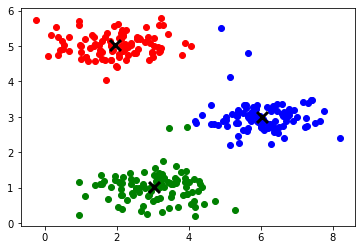

In [10]:
plt_plot(new_idx, K, new_centroids)

In [11]:
mat2 = loadmat("bird_small.mat")
A = mat2["A"]
# preprocess and reshape the image
X2 = (A/255).reshape(128*128,3)

In [12]:
X2.shape

(16384, 3)

In [23]:
np.mean(A)

114.67423502604167

In [13]:
X2

array([[0.85882353, 0.70588235, 0.40392157],
       [0.90196078, 0.7254902 , 0.45490196],
       [0.88627451, 0.72941176, 0.43137255],
       ...,
       [0.25490196, 0.16862745, 0.15294118],
       [0.22745098, 0.14509804, 0.14901961],
       [0.20392157, 0.15294118, 0.13333333]])

In [14]:
K2 = 16

centroids2 = kMeansInitCentroids(X2, K2)
centroids2.shape

(16, 3)

In [15]:
new_centroids2 = decent(X2, centroids2, K2, 20, 3)

In [16]:
idx2 = findClosestCentroids(X2, new_centroids2)

In [17]:
idx2

array([[ 7.],
       [ 7.],
       [ 7.],
       ...,
       [16.],
       [16.],
       [16.]])

In [18]:
new_centroids2.shape

(16, 3)

In [19]:
X2_recovered = X2.copy()
for i in range(1,K2+1):
    X2_recovered[(idx2==i).ravel(),:] = centroids2[i-1]

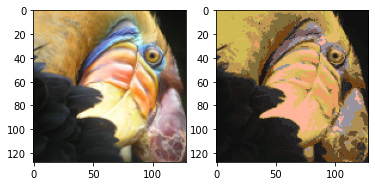

In [20]:
X2_recovered = X2_recovered.reshape(128,128,3)
# Display the image
import matplotlib.image as mpimg
fig, ax = plt.subplots(1,2)
ax[0].imshow(X2.reshape(128,128,3))
ax[1].imshow(X2_recovered)